<a href="https://colab.research.google.com/github/Abhiramnaidu1/Pretrained-Encyclopedia/blob/main/Pretrained%20Encyclopedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pretrained Encyclopedia: Weakly Supervised Knowledge-Pretrained Language Model**

**Authors:** Wenhan Xiong, Jingfei Du, William Yang Wang, Veselin Stoyanov

**Name:** N V Abhiram Naidu

**UIN:** 01184477

**email:** nkank001@odu.edu

**Subject:** CS722 - Machine Learning

## **DESCRIPTION:**

Natural Language Processing (NLP) is current 
state of art technology which has seen major 
advancements in recent years from offline 
speech to text transcribing to image translation 
to natural language tasks seem unbelievable. 
Language models have come a long way from 
traditional LSTM to new Bidirectional encoders 
with relational transformers. The new 
transformers-based models use two methods 
namely Pretraining and Finetuning to make the 
language model to adapt to every context of 
natural language. Pretrained models achieve 
strong improvements on tasks that involve realworld knowledge like based on context, 
suggesting that large-scale language modeling 
could be an implicit method to capture 
knowledge. In this work, the researchers further 
investigate the extent to which pretrained 
models such as BERT capture knowledge and 
use it effectively using a zero-shot fact 
completion task and question answering tasks. 
Moreover, the researchers propose a simple yet 
effective task for weakly supervised pretraining 
model, which explicitly forces the language
model to incorporate knowledge about realworld entities. By pretraining weakly supervised 
language models to learn entity level 
knowledge and storing information these
models will yield significant improvements on 
the fact completion and question answering
tasks.

## **PROBLEM STATEMENT:**

Most of the models require some form and some 
extent of supervision to complete a task. But by 
creating a weakly supervisedmodel which will be 
pretrained initially by storing entity level
knowledge, it can be used in future cases where 
no to less supervision is required by the model. 
we can perform various NLP tasks easier with 
less supervision and interruption.

## **OBJECTIVE STATEMENT:**

 am new to the topics of Machine Learning but 
by going through classroom discussions and the 
course program I have learnt basics of Machine 
learning models and algorithms. I have learned 
the difference types of sampling methods and 
training, testing techniques like supervised, 
semi-supervised and unsupervised learning. I 
have learnt sampling models like stratified, 
random and bootstrapping. I worked on 
recommendation systems and NLTK modules in 
my previous courses. I think that will help me in 
understanding and solving this paper. I am 
currently doing another project on Natural 
language processing, so I am very interested in 
this topic

## **Algorithm:**

To create a pretrained language model the researchers 
have used the Transformer (Vaswani et al., 2017) model 
used by BERT (Devlin et al., 2019). We can use the same 
architecture as BERT base: 12 Transformer layers, each 
with hidden dimension 768. We initialize the 
transformer with a model pretrained based on our own 
BERT reimplementation’s. For each entity, we create a 
list with boundary words (words before and after the 
entity mention) which is finally represented as a column
to make predictions. The researchers have simply 
concatenated the boundary words representations and 
add a linear layer for prediction. The researchers have
first tested their model on a fact completion task. This task 
resembles traditional knowledge base completion: it 
requires the model to complete missing entities in factual 
triples. We further test on two real-world downstream 
tasks that require entity-level knowledge – question 
answering and fine-grained entity typing.

### **Pre Training**

For pretraining we use two procedures called masked language model and Next sentence prediction. When we give two sentences as input it will see when the sentence starts and when sentence ends. We will convert each word to tokens and see if the second sentence is followed by first sentence. The sentence pair will be first unlabelled after masking each word and understanding context the result will be sent to C which is the label 'IsNext' and 'NotNext'

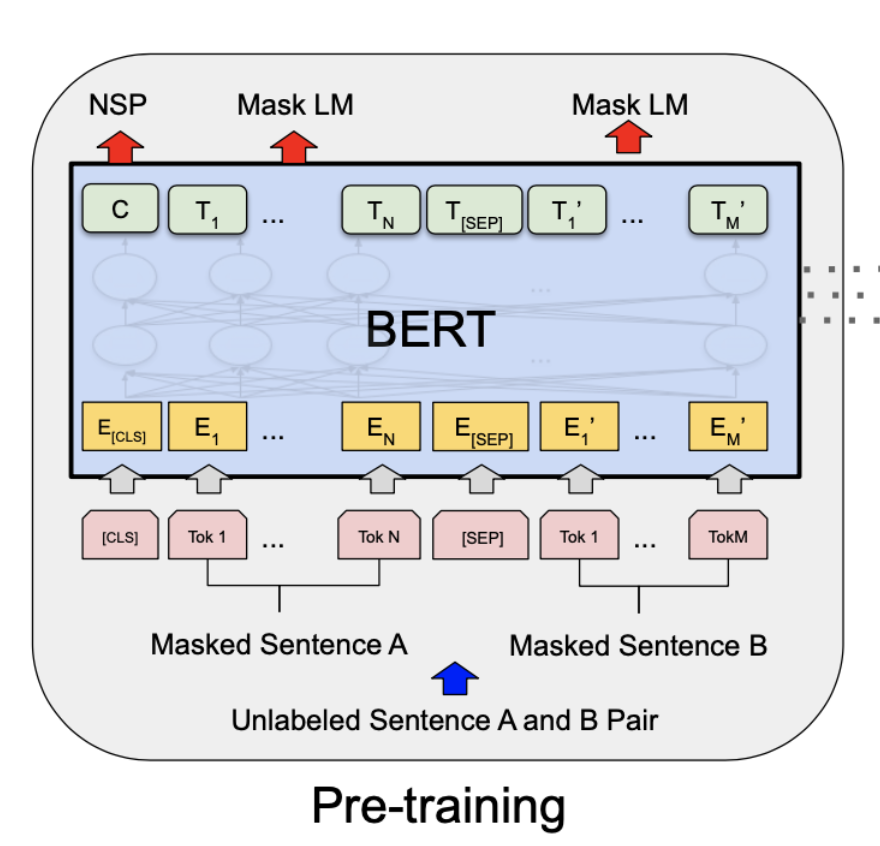

#### **Word Tokens to Embeddings**

Here for converting word tokens into embeddings is a 3 step process, the initial embedding for each word is constructed by three vectors, token embeddings, segment and position
we have two special charecters in input
cls - tells us begining of input sentence, sep - tells us ending of a sentence
BERT has a vocabulary of 30,000 words  . play is in BERT vocabulary not 'playing' so it split into 'play' and 'ing'


**Token Embeddings :** For token embedding each word will be converted to an embedding taken from BERT dictionary which contaions almost 30,000 words

**Segment Embeddings :** Segment Embeddings shows to which sentence each word belongs to. Here when we consider sentence A as first sentence [CLS] and [SEP] surrounding sentence A will be assigned segment embedding of sentence A and the exit words of [SEP] will be assigned segment embedding of sentence B.

**Position Embeddings :** Position Embedding determines where each word is present CLS  and SEP are also considered words and the position of these show where a sentence starts and where a sentence ends.

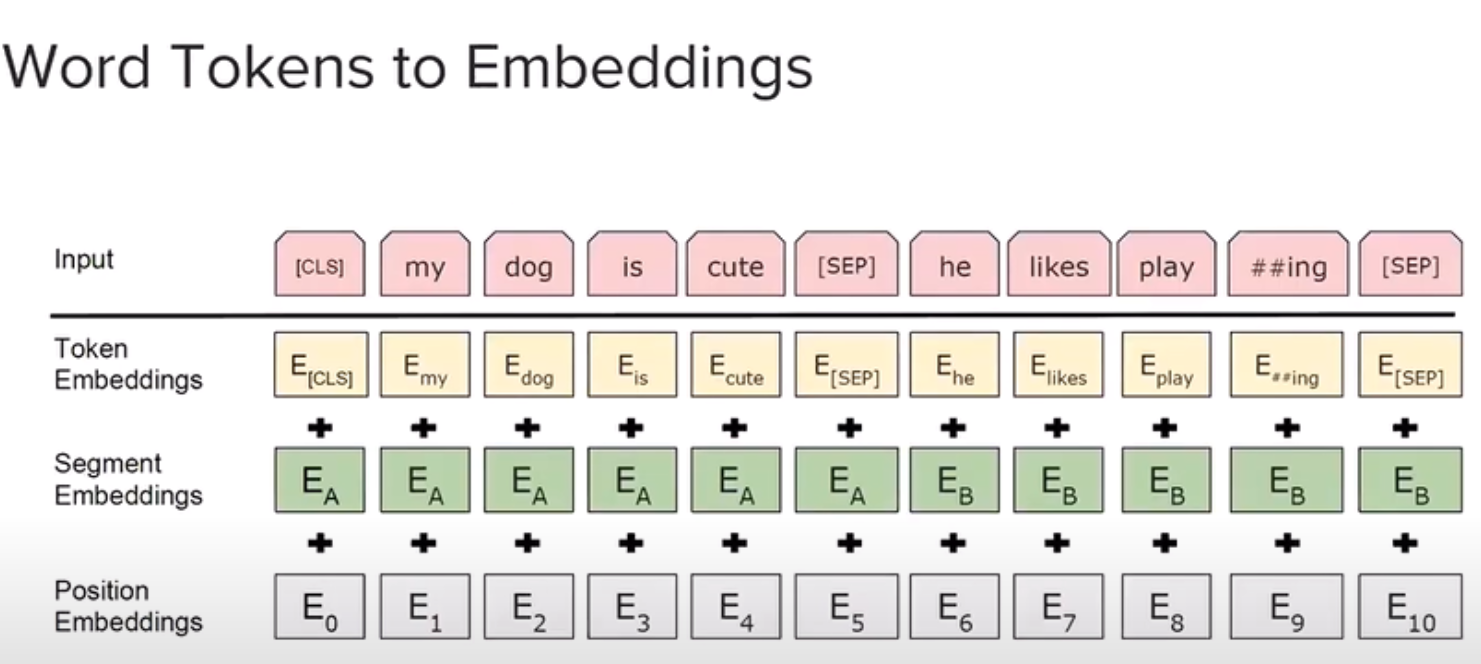

#### **Bidirectional Language Model**

There are three types of language model on basis of word masking.

**Left-to-Right Language Model :** When we use left to right language model we will start masking the models from left end of each sentence and end at the right end 

**Right-to-Left Language Model :** When we use right to left language model we will start masking the models from right end of each sentence and end at the left end. 

**Bidirectional Language Model :** When using bidirectional language model we will start masking the sentence from both ends and meet in the middle.

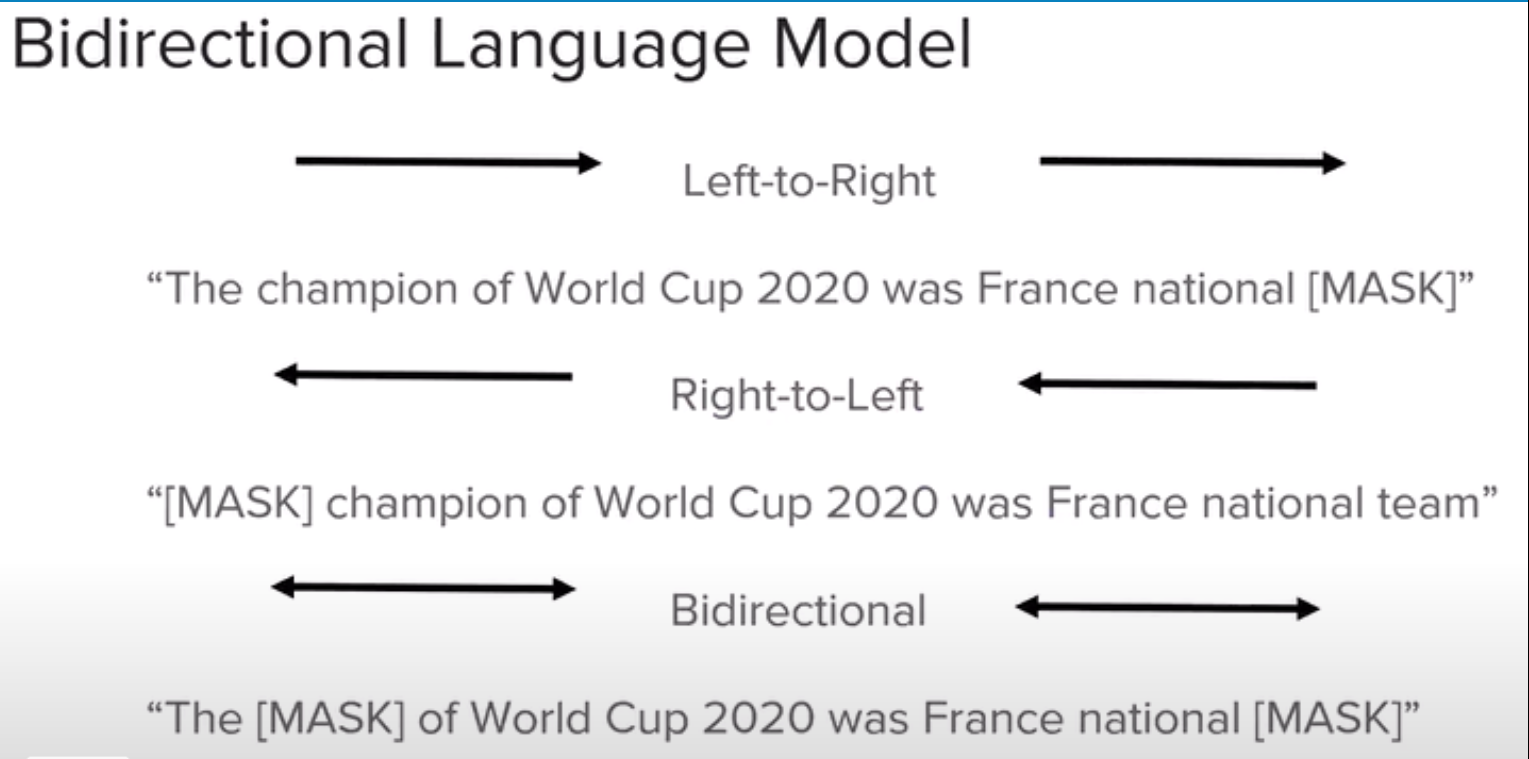

#### **Masked Language Model strategy**

We use a masking strategy for masked language model by feeding word sequences into BERT and replacing 15% of the words in the sequence with masked values. So out of these 80% of the words are replaced with [MASK] token, 10% of the words are replaced with random token and the rest 10% of the time the tokens are left the same. By using this strategy the model attempts to predict the original value of masked words.

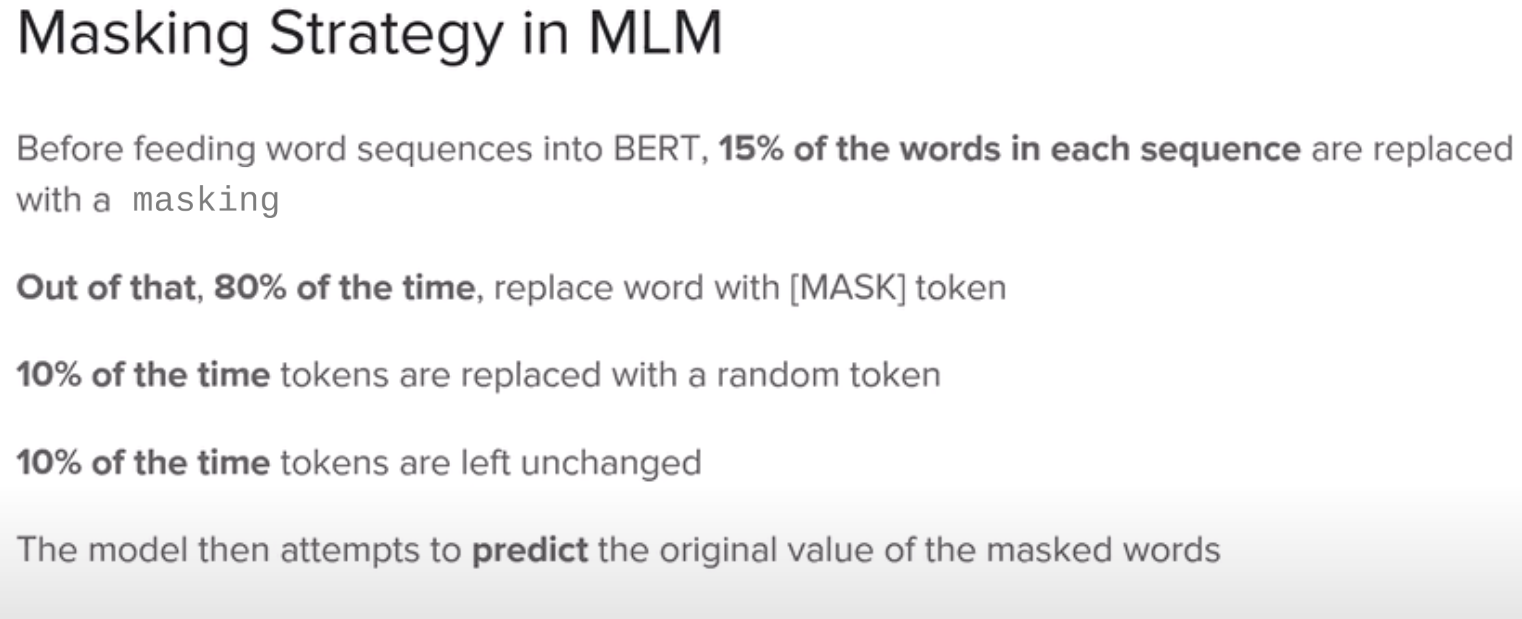

#### **Next Sentence Prediction**

Using the above masking strategy and masking models we will try to predict if the second sentence is being followed by first sentence. And the result will be sent to C which is a binary value of true or false.

The model checks if the first sentence context makes second sentence context is same

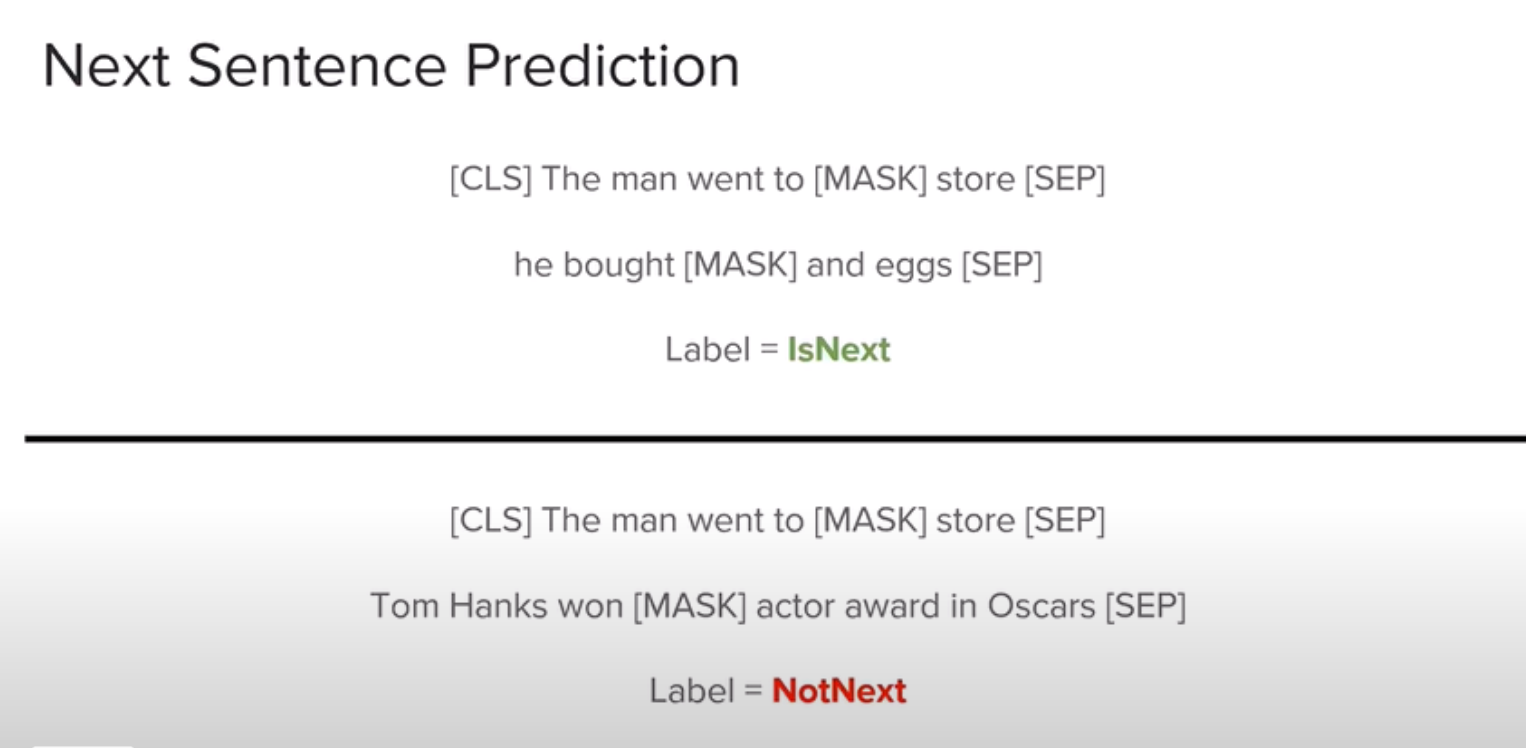

### **Entity Replacement Training**

For Pretraining using Entity Replacement Training technique we will take all anchors of wikidata as entities and create a cluster for each type of entity. And when we use masked language modelling we will replace each entity with other entity belonging to same cluster instead of masking. Each test case will be evaluated by training our model and predicting the labels as 'True' or 'False'. So, This makes our model learn entity level knowledge. 

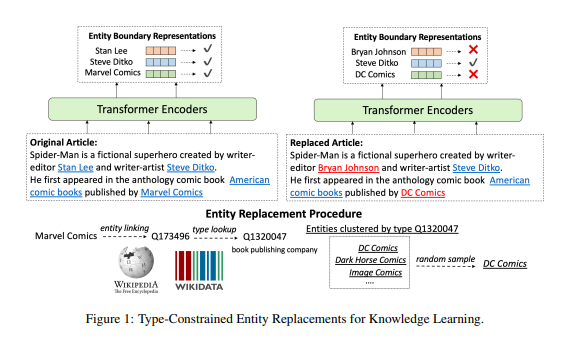

## **Implementation**

### **Importing Libraries**

Importing transformers libraries and modules BertForQuestionAnswering, BertTokenizer, Pipelines.

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.3 MB 8.6 MB/s 
     |████████████████████████████████| 3.3 MB 44.3 MB/s 
     |████████████████████████████████| 895 kB 48.2 MB/s 
     |████████████████████████████████| 61 kB 524 kB/s 
     |████████████████████████████████| 596 kB 46.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers

In [ ]:
import torch
from transformers import BertForQuestionAnswering

bert_qa_model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
from transformers import BertTokenizer

bert_qa_tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

importing binarizer and f1_score modules from sklearn library to calculate f1 score

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

import tokenizers


Importing NLTK(Natural Language Tool Kit) library and modules like word_tokenize, stop_words and porterstemmer for text data processing.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
import textwrap

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from difflib import SequenceMatcher

In [ ]:
from transformers import pipeline

In [ ]:
import warnings

### **Dataset**

I have downloaded SQUaD dataset and uploaded the JSON files to my github. By using pandas dataframe we can read the Json format and store the training and testing data into dataframes

In [ ]:
squad_train_data = pd.read_json('https://raw.githubusercontent.com/Abhiramnaidu1/ML_dataset/main/squad/train-v2.0.json')
squad_test_data = pd.read_json('https://raw.githubusercontent.com/Abhiramnaidu1/ML_dataset/main/squad/dev-v2.0.json')

In [ ]:
squad_train_data.head(1)['data']

0    {'title': 'Beyoncé', 'paragraphs': [{'qas': [{...
Name: data, dtype: object

Changing Json format data to dataframe data

In [ ]:
titles = []
contexts = []
questions = []
ids =[]
answers = []
answer_start = []
titles_test = []
contexts_test = []
questions_test = []
ids_test =[]
answers_test = []
answer_start_test = []
is_impossible = []
is_impossible_test = []
for i in squad_train_data['data']:
  title = i['title']
  for j in i['paragraphs']:
    context = j['context']
    for k in j['qas']:
      question = k['question']
      id_ = k['id']
      is_impossible_ = k['is_impossible']
      for l in k['answers']:
        titles.append(title)
        contexts.append(context)
        questions.append(question)
        ids.append(id_)
        answers.append(l['text'])
        answer_start.append(l['answer_start'])
        is_impossible.append(is_impossible_)

for i in squad_test_data['data']:
  title_test = i['title']
  for j in i['paragraphs']:
    context_test = j['context']
    for k in j['qas']:
      question_test = k['question']
      id_test_ = k['id']
      is_impossible_test_ = k['is_impossible']
      for l in k['answers']:
        titles_test.append(title_test)
        contexts_test.append(context_test)
        questions_test.append(question_test)
        ids_test.append(id_test_)
        answers_test.append(l['text'])
        answer_start_test.append(l['answer_start'])
        is_impossible_test.append(is_impossible_test_)

In [ ]:
'''for i in is_impossible:
  if i == 'True':
    print('h')'''
for i in is_impossible_test:
  if i == 'True':
    print('h')

In [ ]:
train = pd.DataFrame({'title':titles, 'question':questions, 'id':ids, 'answers':answers, 'answer_start':answer_start ,'context':contexts})
test = pd.DataFrame({'title':titles_test, 'question':questions_test, 'id':ids_test, 'answers':answers_test, 'answer_start':answer_start_test ,'context':contexts_test})

In [ ]:
train.head(5)

,title,question,id,answers,answer_start,context
0,Beyoncé,When did Beyonce start becoming popular?,56be85543aeaaa14008c9063,in the late 1990s,269,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
1,Beyoncé,What areas did Beyonce compete in when she was...,56be85543aeaaa14008c9065,singing and dancing,207,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
2,Beyoncé,When did Beyonce leave Destiny's Child and bec...,56be85543aeaaa14008c9066,2003,526,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
3,Beyoncé,In what city and state did Beyonce grow up?,56bf6b0f3aeaaa14008c9601,"Houston, Texas",166,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
4,Beyoncé,In which decade did Beyonce become famous?,56bf6b0f3aeaaa14008c9602,late 1990s,276,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...


### **Training Model**

Taking 100 rows of data due to memory constraits

In [ ]:
train= train.head(100)
MAX_LEN=135

In [ ]:
rec = train.shape[0]  # Number of records in the training set
inputs = np.ones((rec, MAX_LEN), dtype = 'int32') # Input vector
attention_mask = np.zeros((rec, MAX_LEN), dtype = 'int32') # Attention Mask
token_type_ids = np.zeros((rec, MAX_LEN), dtype = 'int32') # Tokens produced
start_tokens = np.zeros((rec, MAX_LEN), dtype = 'int32') # Start logit for answer
end_tokens = np.zeros((rec, MAX_LEN), dtype = 'int32') # End logit for answer

for i in range(rec):

  context = ' '+' '.join(train.loc[i, 'context'].split())
  answer = ' '+' '.join(train.loc[i, 'answers'].split())
  question = ' '+' '.join(train.loc[i, 'question'].split())

  start_idx = train.loc[i, 'answer_start']

  chars = np.zeros((len(context)))
  chars[start_idx:start_idx + len(answer)] = 1
  if context[start_idx - 1] == ' ':
    chars[start_idx - 1] = 1
  
  enc1 = bert_qa_tokenizer.encode(context)
  enc2 = bert_qa_tokenizer.encode(question)
  print(enc1)
  # For resource limitations only.

  if len(enc1) + len(enc2) + 4 < MAX_LEN:

    #creating offsets
    offsets = []
    start_idx = 0

    for t in enc1:
      w = bert_qa_tokenizer.decode([t])
      offsets.append((start_idx, start_idx + len(w)))
      start_idx += len(w)
    
    

    tokens = []
    for j, (a, b) in enumerate(offsets):
      sum_ = np.sum(chars[a:b])
      if sum_ > 0:
        tokens.append(j)

   
    inputs[i, :len(enc1) + len(enc2) + 4] = [0] + enc2 + [2,2] + enc1 + [2]

    attention_mask[i, :len(enc1) + len(enc2) + 4] = 1

    if len(tokens) > 0:
      start_tokens[i, tokens[0] + 1] = 1
      end_tokens[i, tokens[-1] + 1] = 1

[101, 20773, 21025, 19358, 22815, 1011, 5708, 1006, 1013, 12170, 23432, 29715, 3501, 29678, 12325, 29685, 1013, 10506, 1011, 10930, 2078, 1011, 2360, 1007, 1006, 2141, 2244, 1018, 1010, 3261, 1007, 2003, 2019, 2137, 3220, 1010, 6009, 1010, 2501, 3135, 1998, 3883, 1012, 2141, 1998, 2992, 1999, 5395, 1010, 3146, 1010, 2016, 2864, 1999, 2536, 4823, 1998, 5613, 6479, 2004, 1037, 2775, 1010, 1998, 3123, 2000, 4476, 1999, 1996, 2397, 4134, 2004, 2599, 3220, 1997, 1054, 1004, 1038, 2611, 1011, 2177, 10461, 1005, 1055, 2775, 1012, 3266, 2011, 2014, 2269, 1010, 25436, 22815, 1010, 1996, 2177, 2150, 2028, 1997, 1996, 2088, 1005, 1055, 2190, 1011, 4855, 2611, 2967, 1997, 2035, 2051, 1012, 2037, 14221, 2387, 1996, 2713, 1997, 20773, 1005, 1055, 2834, 2201, 1010, 20754, 1999, 2293, 1006, 2494, 1007, 1010, 2029, 2511, 2014, 2004, 1037, 3948, 3063, 4969, 1010, 3687, 2274, 8922, 2982, 1998, 2956, 1996, 4908, 2980, 2531, 2193, 1011, 2028, 3895, 1000, 4689, 1999, 2293, 1000, 1998, 1000, 3336, 2879, 1000

In [ ]:
def build_model():
  ids = tf.keras.layers.Input((MAX_LEN,), dtype = tf.int32)
  att = tf.keras.layers.Input((MAX_LEN,), dtype = tf.int32)
  tok = tf.keras.layers.Input((MAX_LEN,), dtype = tf.int32)
  print(att)

  
  # x=DistlBert_model

  
  
  bert_model = bert_qa_model
 
  x = bert_model(ids, attention_mask=att, token_type_ids = tok)
  print(att)
  # For start logit

  x1 = tf.keras.layers.Dropout(0.1)(x[0])
  x1 = tf.keras.layers.Conv1D(1,1)(x1)
  x1 = tf.keras.layers.Flatten()(x1)
  x1 = tf.keras.layers.Activation('softmax')(x1)
  
  # For end logit

  x2 = tf.keras.layers.Dropout(0.1)(x[0]) 
  x2 = tf.keras.layers.Conv1D(1,1)(x2)
  x2 = tf.keras.layers.Flatten()(x2)
  x2 = tf.keras.layers.Activation('softmax')(x2)

  # Initalising the model

  model = tf.keras.models.Model(inputs = [ids, att, tok], outputs = [x1, x2])
  optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-5)
  model.compile(loss='categorical_crossentropy', optimizer = optimizer)

  return model

In [ ]:
test = test.drop_duplicates( subset=None, keep="first", inplace=False)

#### **BERT Question answering model finetuned with SQuaD dataset**

In [ ]:
def bert_qa_answer_question(question, answer_text):
    
    # Apply the tokenizer and segment input text of question and context pair.
    input_ids = bert_qa_tokenizer.encode(question, answer_text)
    sep_index = input_ids.index(bert_qa_tokenizer.sep_token_id)
    num_seg_a = sep_index + 1
    num_seg_b = len(input_ids) - num_seg_a

    # Construct the list of 0s and 1s.
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    assert len(segment_ids) == len(input_ids)
    outputs = bert_qa_model(torch.tensor([input_ids]), 
                    token_type_ids=torch.tensor([segment_ids]), 
                    return_dict=True) 

    start_scores = outputs.start_logits
    end_scores = outputs.end_logits

    # Find the tokens with the highest `start` and `end` scores.
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)

    # Get the string versions of the input tokens.
    tokens = bert_qa_tokenizer.convert_ids_to_tokens(input_ids)
    answer = tokens[answer_start]

    # Select the remaining answer tokens and join them with whitespace.
    for i in range(answer_start + 1, answer_end + 1):
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
        else:
            answer += ' ' + tokens[i]

    print('Answer: "' + answer + '"')
    return answer

#### Model Verification

In [ ]:


# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=80) 

bert_abstract = "We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models (Peters et al., 2018a; Radford et al., 2018), BERT is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement)."

print(wrapper.fill(bert_abstract))

We introduce a new language representation model called BERT, which stands for
Bidirectional Encoder Representations from Transformers. Unlike recent language
representation models (Peters et al., 2018a; Radford et al., 2018), BERT is
designed to pretrain deep bidirectional representations from unlabeled text by
jointly conditioning on both left and right context in all layers. As a result,
the pre-trained BERT model can be finetuned with just one additional output
layer to create state-of-the-art models for a wide range of tasks, such as
question answering and language inference, without substantial taskspecific
architecture modifications. BERT is conceptually simple and empirically
powerful. It obtains new state-of-the-art results on eleven natural language
processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute
improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1
question answering Test F1 to 93.2 (1.5 point absolute improvement) 

In [ ]:
question = "What are some example applications of BERT?"

bert_qa_answer_question(question, bert_abstract)

Answer: "question answering and language inference"


'question answering and language inference'

In [ ]:
question = "What does the 'B' in BERT stand for?"

bert_qa_answer_question(question, bert_abstract)

Answer: "bidirectional encoder representations from transformers"


'bidirectional encoder representations from transformers'

#### **Distilled BERT base model finetuned with SQuaD dataset**




In [ ]:
nlp_qa = pipeline('question-answering')

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
def distil_bert_answer_model(question,context):
  return nlp_qa(question,context)['answer']

#### Model Verification

In [ ]:
question = "What does the 'B' in BERT stand for?"
distil_bert_answer_model(question,bert_abstract)

'Bidirectional Encoder Representations from Transformers'

In [ ]:
question = "What are some example applications of BERT?"
nlp_qa(question,bert_abstract)['answer']

'question answering and language inference'

## **Evaluation**

In [ ]:
test

,title,question,id,answers,answer_start,context,predicted_answer_bert_qa,predicted_answer_distil_bert_qa,EM_score_bert_qa,EM_score_distil_bert_qa
0,Normans,In what country is Normandy located?,56ddde6b9a695914005b9628,France,159,The Normans (Norman: Nourmands; French: Norman...,france,France,1.000000,1.000000
4,Normans,When were the Normans in Normandy?,56ddde6b9a695914005b9629,10th and 11th centuries,94,The Normans (Norman: Nourmands; French: Norman...,10th and 11th centuries,10th and 11th centuries,1.000000,1.000000
5,Normans,When were the Normans in Normandy?,56ddde6b9a695914005b9629,in the 10th and 11th centuries,87,The Normans (Norman: Nourmands; French: Norman...,10th and 11th centuries,10th and 11th centuries,1.000000,1.000000
8,Normans,From which countries did the Norse originate?,56ddde6b9a695914005b962a,"Denmark, Iceland and Norway",256,The Normans (Norman: Nourmands; French: Norman...,"denmark , iceland and norway","Denmark, Iceland and Norway",1.000000,1.000000
12,Normans,Who was the Norse leader?,56ddde6b9a695914005b962b,Rollo,308,The Normans (Norman: Nourmands; French: Norman...,rollo,Rollo,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
892,Southern_California,What are the ties that best described what the...,5705e26d75f01819005e76d7,demographics and economic,214,"Southern California, often abbreviated SoCal, ...",demographics and economic,demographics and economic,1.000000,1.000000
893,Southern_California,The reasons for the las two counties to be add...,5705e26d75f01819005e76d8,historical political divisions,451,"Southern California, often abbreviated SoCal, ...",historical political divisions,demographics and economic ties,1.000000,0.117647
896,Southern_California,What is the name of the region that is not def...,5705e33f52bb89140068964c,Southern California Megaregion,62,The 8- and 10-county definitions are not used ...,greater southern california megaregion,Southern California Megaregion,0.888889,1.000000
897,Southern_California,What is the name of the region that is not def...,5705e33f52bb89140068964c,the greater Southern California Megaregion,50,The 8- and 10-county definitions are not used ...,greater southern california megaregion,Southern California Megaregion,1.000000,0.888889


In [ ]:
test=test.head(500)

### **AnswerPrediction using BERT Question Answering Model**

In [ ]:
test['predicted_answer_bert_qa'] = test.apply(lambda x:bert_qa_answer_question(x.question,x.context),axis=1)

Answer: "france"
Answer: "10th and 11th centuries"
Answer: "10th and 11th centuries"
Answer: "denmark , iceland and norway"
Answer: "rollo"
Answer: "10th"
Answer: "10th"
Answer: "10th"
Answer: "william the conqueror"
Answer: "richard i of normandy"
Answer: "christian"
Answer: "christian"
Answer: "norseman , viking"
Answer: "norseman , viking"
Answer: "9th century"
Answer: "911"
Answer: "king charles iii of west francia"
Answer: "river seine"
Answer: "river seine"
Answer: "rollo"
Answer: "norse religion and old norse language with catholicism ( christianity"
Answer: "north"
Answer: "north"
Answer: "fighting horsemen"
Answer: "the pechenegs , the bulgars , and especially the seljuk turks"
Answer: "the pechenegs , the bulgars , and especially the seljuk turks"
Answer: "the pechenegs , the bulgars , and especially the seljuk turks"
Answer: "1050s"
Answer: "1050s"
Answer: "1060s"
Answer: "1060s"
Answer: "alexius komnenos"
Answer: "afranji"
Answer: "oursel"
Answer: "turkish forces"
Answer: "

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### **AnswerPrediction using Distilled BERT Model**

In [ ]:
test['predicted_answer_distil_bert_qa'] = test.apply(lambda x:distil_bert_answer_model(x.question,x.context),axis=1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## **Metrics**

### **Test Normalization**

For Text Normalization, I have taken NLTK library called Natural language toolkit library for python and imported stopwords for english. We apply multiple functions to normalize data.

**1. Split words:** In this function we will split the predicted answer words with a separator ' '. We do this to filter unneccessary words in further steps. 

**2. Stop Words:** We will remove all the stop words of english from the predicted answer. these stop words are mostly prepositions,articles and some pronouns.
for example: is, and, it's, this, for , in, a ,the, etc.

**3. Stemming:** Most of the english words are derived from greek or roman  root words. A root word is the smallest element that makes sense when a word is broken down to sub parts and the root word plays important role on the actual word Stemming is a method of converting a string to its root word.
To accomplish stemming we used a potterstemmer module from NLTK library.

**4. Lower Case:** By converting the entire string to lower case we are converting entire string to same case which will be easier when we apply similarity function.

In [ ]:

stop_words = stopwords.words('english')
ps=PorterStemmer()

In [ ]:
def normalize_text(answer):

  def split_answer(answer):
    return answer.split(' ')
  
  def answer_wo_stopwords(answer):
    stop_words = stopwords.words('english')
    stop_word_list=[]
    for i in answer:
      if i not in stop_words:
        stop_word_list.append(i)
    return stop_word_list
      

  def root_answer(answer):
    ps=PorterStemmer()
    stem_list=[]
    for i in answer:
      stem_word= ps.stem(i)
      stem_list.append(stem_word)
    return stem_list
  
  def lower_answer(answer):
    new_answer = ''.join(answer)
    low_answer = new_answer.lower()
    return low_answer
      
  splitted_answer= split_answer(answer)
  stopwords_no_answer =answer_wo_stopwords(splitted_answer)
  rootwords_answer = root_answer(stopwords_no_answer)
  norm_answer = lower_answer(rootwords_answer)
  
  return norm_answer

In [ ]:
normalize_text("in the late 1990s")


'late1990'

### **EM score**

The Exact Match metric measures the percentage of predictions that match  the ground truth answers exactly. So to make sure we get correct results we have normalized the data using above function.

Using SequenceMatcher library we can see how similar two words are, we will get ratio after comparison and the similarity value lies between 0 to 1 where 0 is completely distinct words and 1 is exactly same words

In [ ]:


def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def Exact_Match(word1,word2):
  norm_word1=normalize_text(word1)
  norm_word2=normalize_text(word2)
  EM_score = similar(norm_word1,norm_word2)
  return EM_score


In [ ]:
test['EM_score_bert_qa'] = test.apply(lambda x:Exact_Match(x.answers,x.predicted_answer_bert_qa),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test['EM_score_distil_bert_qa'] = test.apply(lambda x:Exact_Match(x.answers,x.predicted_answer_distil_bert_qa),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### **F1 Measure**

The F1 score metric is a metric measures the average overlap between the prediction and ground truth answer. We first normalize text data and use Binarizier to convert it to a binary value which makes it easier to compare predicted values with original values.

In [ ]:

binarizer = MultiLabelBinarizer()

def f1_score_model(y_true,y_pred):
  y_true=y_true.apply(normalize_text)
  y_pred=y_pred.apply(normalize_text)
  binarizer.fit(y_true)

  f1_score_value=f1_score(binarizer.transform(y_true), binarizer.transform(y_pred), average='macro')
  return f1_score_value

## **Challenges**

1. Google colab is crashing multiple 
times due to high computations and 
big datasets. I have imported four
datasets, and each contain around 
3GB data with 200 thousand of 
freebase data in json format.

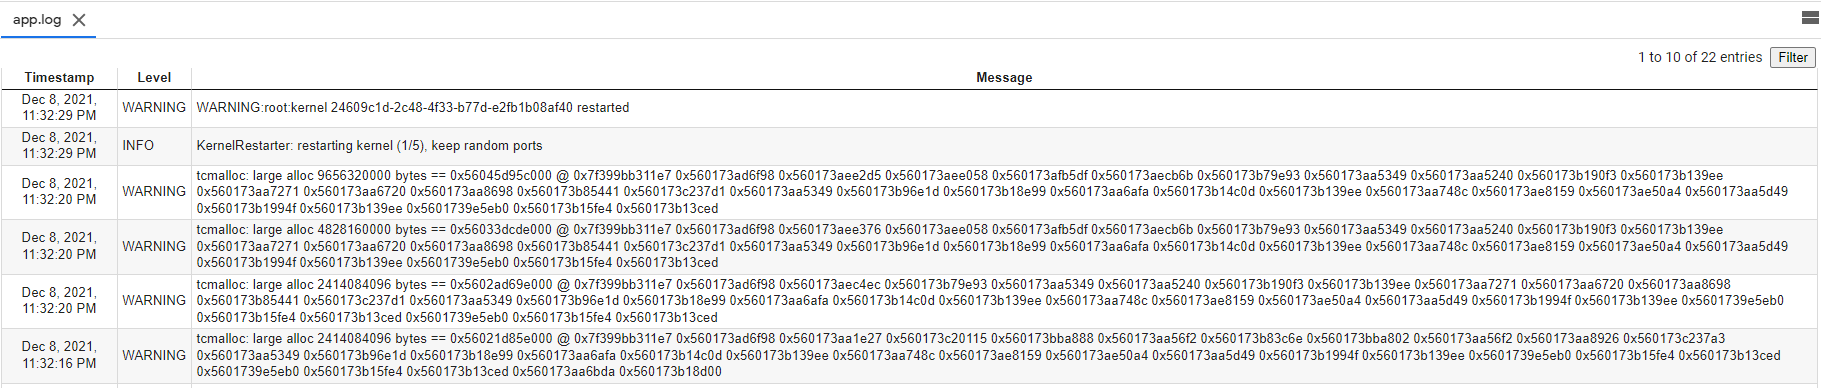


2. Pretraining BERT model with 
Wikipedia dump will take days to 
complete. For pretraining this data in 
one day for one epoch we require 12
NVIDIA-2080TI and it has 32 
instances in each TPU. So, I went with 
wikidata pretrained models 
BertForQuestionAnswering and DistilBert created by 
the HuggingFace Team.


3. Web Questions, Quasar-T and TriviaQA are freebase based datasets, which means they conatin context tab which is stored in freebase website. Currently Freebase servers are down so we cannot use these databases for question answering purposes.

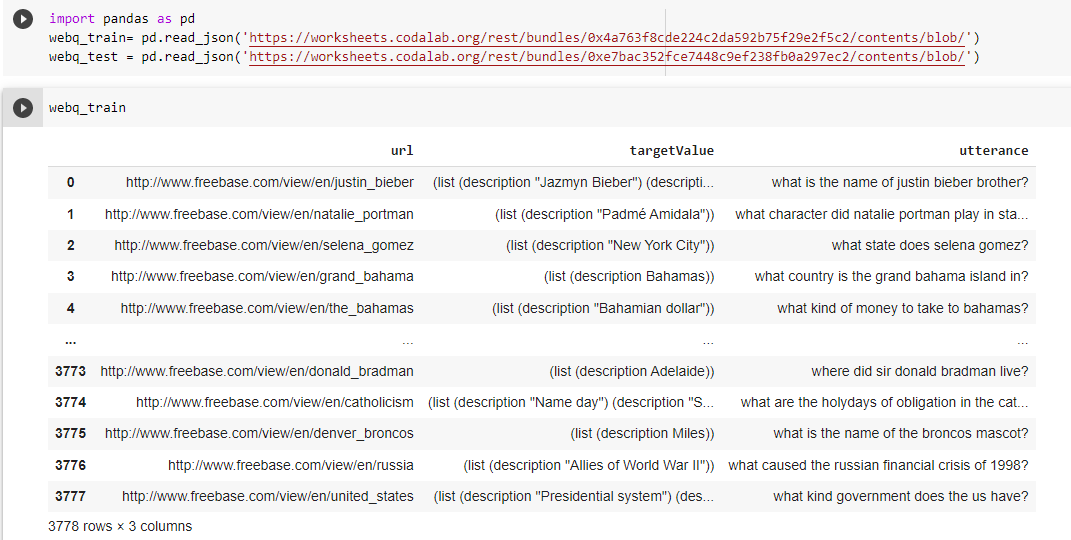

## **Summary**

**EM Score**

In [ ]:
EM_score_bert_qa = test['EM_score_bert_qa'].mean()
EM_score_distil_bert_qa= test['EM_score_distil_bert_qa'].mean()
print('Exact Match score for Bert Question answering model is ',EM_score_bert_qa)
print('Exact Match score for Distiled Bert Pipeling model is ',EM_score_distil_bert_qa)

Exact Match score for Bert Question answering model is  0.8325303277597107
Exact Match score for Distiled Bert Pipeling model is  0.7965695690122543


**Observation :** I have compared Exact match score of  both question answering models BertQuestionAnswering and DistilBert. The Exact match score for Bert Question Answeing model is 83.2% and  DistilBert has  exact match score of 79.66%. Which means BertQuestion Answering model outperforms DistilBert by 3.54%.

**F1 Measure**

In [ ]:
F1_bert_qa = f1_score_model(test['answers'],test['predicted_answer_bert_qa'])
F1_distilbert_qa = f1_score_model(test['answers'],test['predicted_answer_distil_bert_qa'])
print('F1 score for Bert Question answering model is ',F1_bert_qa)
print('F1 score for Distiled Bert Pipeling model is ',F1_distilbert_qa)

F1 score for Bert Question answering model is  0.7269525898584089
F1 score for Distiled Bert Pipeling model is  0.7514998795414526


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['π'] will be ignored
  "unknown class(es) {0} will be ignored".format(sorted(unknown, key=str))


**Observation :** After comparing F1 scores of model BERT QUestion Answering and DistilBert models, we can see that DistilBert model outperforms Bert Question Answering model by 2.9%. The F1 score of Bert Question answering model is 72.69% and DistilBert model has F1 score 75.1%.

## **Conclusion**

When we introduce a weakly supervised method to encourage pretrained language models to learn entity level knowledge.
This method uses minimal entity information during pretraining and does not introduce additional computation, memory or architectural overhead for downstream task fine-tuning. We introduce two versions of pretrained models which is based on bert large version and the other is distilled version of tiny BERT. 
The results show the potential of directly learning entity-level knowledge from unstructured natural language and the benefits of large-scale knowledge-aware pre training for downstream NLP tasks


## **References**

1.	PRETRAINED ENCYCLOPEDIA: WEAKLY SUPERVISED KNOWLEDGE-PRETRAINED LANGUAGE MODEL Wenhan Xiong, Jingfei Du, William Yang Wang, Veselin Stoyanov
2.	BERT — transformers 4.12.5 documentation (huggingface.co)
3.	[1905.07129] ERNIE: Enhanced Language Representation with Informative Entities (arxiv.org)
4.	https://arxiv.org/abs/1903.06164
5.	https://arxiv.org/abs/1406.3676
6.	https://arxiv.org/pdf/1704.05179.pdf
7.	bdhingra/quasar: Datasets for Question Answering by Search and Reading (github.com)
8.	nyu-dl/dl4ir-searchQA (github.com)
9.	https://drive.google.com/drive/u/2/folders/1kBkQGooNyG0h8waaOJpgdGtOnlb1S649
10.	https://github.com/thunlp/ERNIE
11.	Pretrained Encyclopedia: Weakly Supervised Knowledge-Pretrained Language Model | Papers With Code
12.	nyu-dl/dl4ir-searchQA (github.com)
13.	BERT base vs BERT large (opengenus.org)
14. https://paperswithcode.com/method/distillbert
15. https://arxiv.org/abs/1910.01108
16. https://medium.com/huggingface/distilbert-8cf3380435b5
17. https://awsdocs-neuron.readthedocs-hosted.com/en/latest/src/examples/tensorflow/huggingface_bert/huggingface_bert.html
18. https://huggingface.co/transformers/master/main_classes/pipelines.html
19. https://medium.com/analytics-vidhya/hugging-face-transformers-how-to-use-pipelines-10775aa3db7e
20. https://medium.com/microsoftazure/accelerate-your-nlp-pipelines-using-hugging-face-transformers-and-onnx-runtime-2443578f4333
21. https://theaidigest.in/zero-shot-classification-using-huggingface-transformers-pipeline/
22. https://stackoverflow.com/questions/64685243/getting-sentence-embedding-from-huggingface-feature-extraction-pipeline
23. https://www.holisticseo.digital/python-seo/nltk/lemmatize#:~:text=How%20to%20use%20NLTK%20Lemmatizaters%20with%20Part%20of,%E2%80%9CJ%E2%80%9D%2C%20%E2%80%9CV%E2%80%9D%20with%20%E2%80%9Cstartswith%E2%80%9D%20method.%20More%20items...%20
24. https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
25. https://www.guru99.com/stemming-lemmatization-python-nltk.html
26. https://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
27. https://qa.fastforwardlabs.com/no%20answer/null%20threshold/bert/distilbert/exact%20match/f1/robust%20predictions/2020/06/09/Evaluating_BERT_on_SQuAD.html
28. https://docs.allennlp.org/models/main/models/rc/metrics/squad_em_and_f1/
29. https://stackoverflow.com/questions/52229059/em-score-in-squad-challenge
30. https://deepai.org/machine-learning-glossary-and-terms/f-score
31. https://vidyasheela.com/what-is-f1-score-and-what-is-its-importance-in-machine-learning/
32. https://www.myaccountingcourse.com/accounting-dictionary/f1-score
33. DistilBERT, a distilled version of BERT: smaller,
faster, cheaper and lighter
Victor SANH, Lysandre DEBUT, Julien CHAUMOND, Thomas WOLF
Hugging Face
